In [1]:
%load_ext extensible_provn.prov_magics
import extensible_provn.view.mutable_prov
BASE = "../generated/mutable_prov"

# Mutable-PROV


## Names, literals, and constants

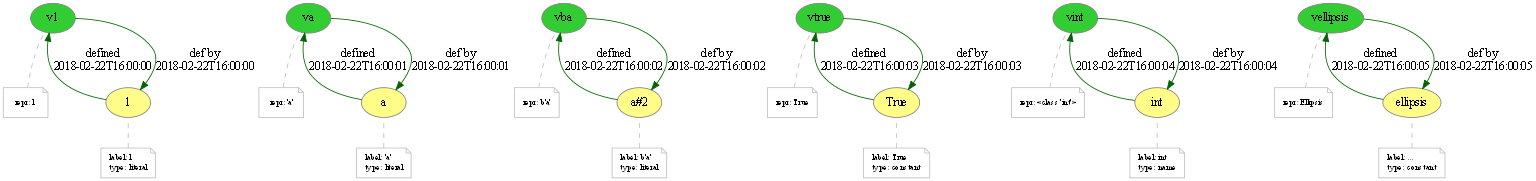

In [2]:
%%provn -o $BASE/names -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

entity(1, [label="1", type="script:literal"])
value(v1, [repr="1"])
defined(1, v1, 2018-02-22T16:00:00)
wasDefinedBy(v1, 1, 2018-02-22T16:00:00)

entity(a, [label="'a'", type="script:literal"])
value(va, [repr="'a'"])
defined(a, va, 2018-02-22T16:00:01)
wasDefinedBy(va, a, 2018-02-22T16:00:01)

entity(a#2, [label="b'a'", type="script:literal"])
value(vba, [repr="b'a'"])
defined(a#2, vba, 2018-02-22T16:00:02)
wasDefinedBy(vba, a#2, 2018-02-22T16:00:02)

entity(True, [label="True", type="script:constant"])
value(vtrue, [repr="True"])
defined(True, vtrue, 2018-02-22T16:00:03)
wasDefinedBy(vtrue, True, 2018-02-22T16:00:03)

entity(int, [label="int", type="script:name"])
value(vint, [repr="<class 'int'>"])
defined(int, vint, 2018-02-22T16:00:04)
wasDefinedBy(vint, int, 2018-02-22T16:00:04)

entity(ellipsis, [label="...", type="script:constant"])
value(vellipsis, [repr="Ellipsis"])
defined(ellipsis, vellipsis, 2018-02-22T16:00:05)
wasDefinedBy(vellipsis, ellipsis, 2018-02-22T16:00:05)

## Assignment

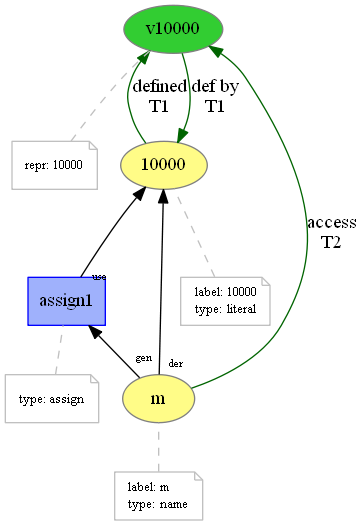

In [3]:
%%provn -o $BASE/assign -e png svg pdf provn 
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

entity(10000, [label="10000", type="script:literal"])
value(v10000, [repr="10000"])
defined(10000, v10000, T1)
wasDefinedBy(v10000, 10000, T1)

entity(m, [label="m", type="script:name"])
accessed(m, v10000, T2)

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1)

## Operation

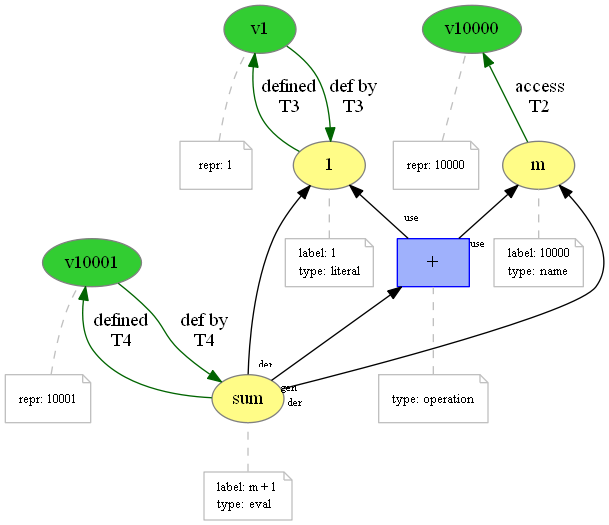

In [4]:
%%provn -o $BASE/operation -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
    
// old
entity(m, [label="10000", type="script:name"])
value(v10000, [repr="10000"])
accessed(m, v10000, T2)

// new
entity(1, [label="1", type="script:literal"])
value(v1, [repr="1"])
defined(1, v1, T3)
wasDefinedBy(v1, 1, T3)

entity(sum, [label="m + 1", type="script:eval"])
value(v10001, [repr="10001"])
defined(sum, v10001, T4)
wasDefinedBy(v10001, sum, T4)

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g2, u3)

## List definition

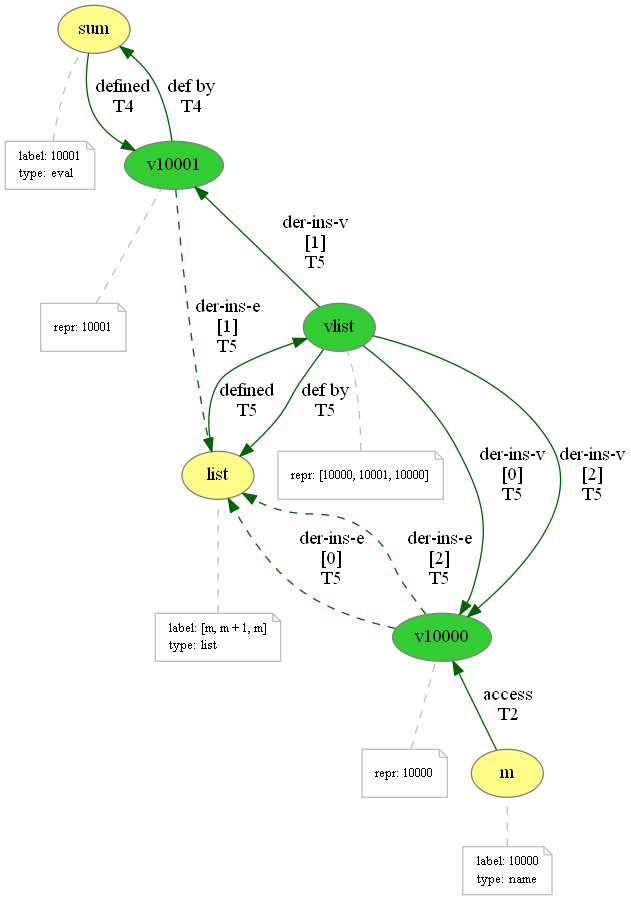

In [5]:
%%provn -o $BASE/list -e png svg pdf provn 
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
entity(m, [label="10000", type="script:name"])
value(v10000, [repr="10000"])
accessed(m, v10000, T2)

entity(sum, [label="10001", type="script:eval"])
value(v10001, [repr="10001"])
defined(sum, v10001, T4)
wasDefinedBy(v10001, sum, T4)

// new
entity(list, [label="[m, m + 1, m]", type="script:list"])
value(vlist, [repr="[10000, 10001, 10000]"])
derivedByInsertion(
    list, vlist,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
defined(list, vlist, T5)
wasDefinedBy(vlist, list, T5)

## Assignment of list definition

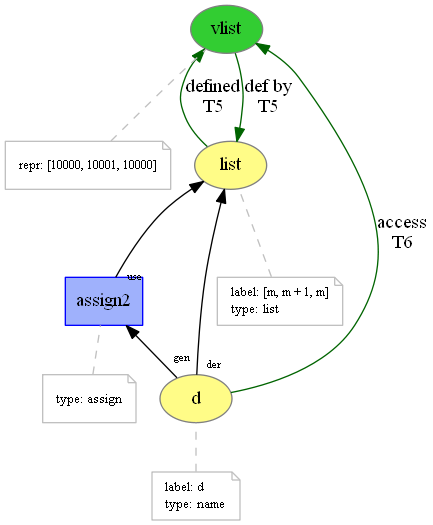

In [6]:
%%provn -o $BASE/list_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
entity(list, [label="[m, m + 1, m]", type="script:list"])
value(vlist, [repr="[10000, 10001, 10000]"])
defined(list, vlist, T5)
wasDefinedBy(vlist, list, T5)

// new
entity(d, [label="d", type="script:name"])
accessed(d, vlist, T6)

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4)

### Assignment 2

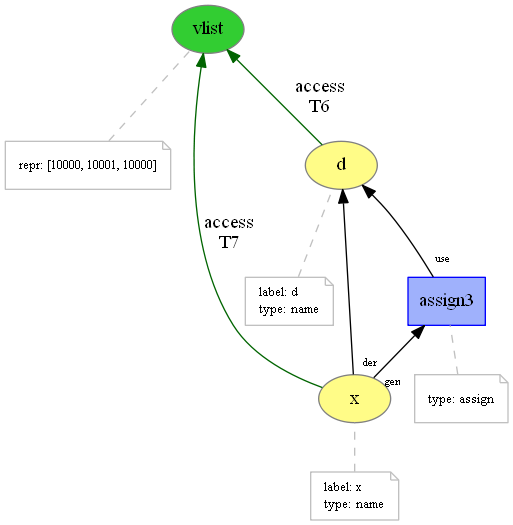

In [7]:
%%provn -o $BASE/list_assign2 -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
value(vlist, [repr="[10000, 10001, 10000]"])
entity(d, [label="d", type="script:name"])
accessed(d, vlist, T6)

// new
entity(x, [label="x", type="script:name"])
accessed(x, vlist, T7)

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5)

## Function call

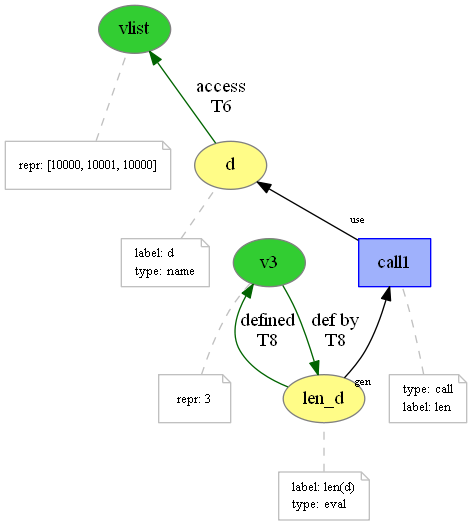

In [8]:
%%provn -o $BASE/call -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
value(vlist, [repr="[10000, 10001, 10000]"])
entity(d, [label="d", type="script:name"])
accessed(d, vlist, T6)

// new
entity(len_d, [label="len(d)", type="script:eval"])
value(v3, [repr="3"])
defined(len_d, v3, T8)
wasDefinedBy(v3, len_d, T8)

activity(call1, [type="script:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

## Access to part of structure

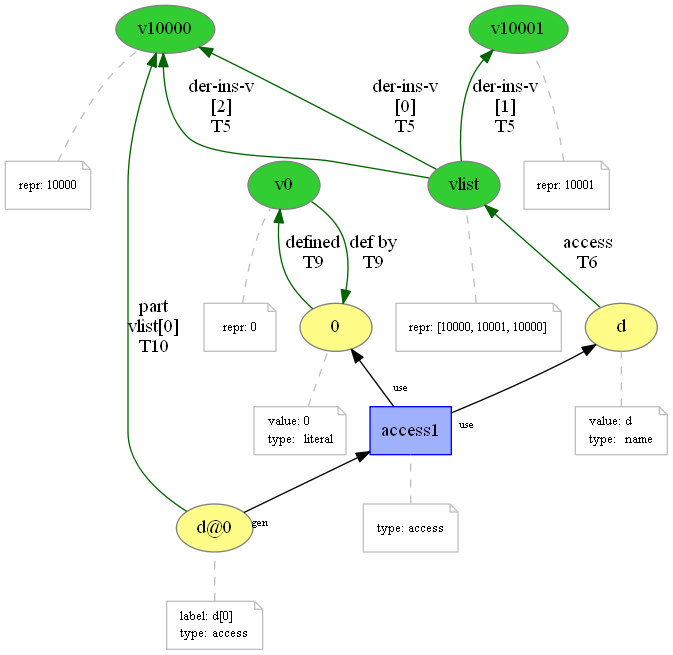

In [9]:
%%provn -o $BASE/access -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
value(vlist, [repr="[10000, 10001, 10000]"])
value(v10000, [repr="10000"])
value(v10001, [repr="10001"])
derivedByInsertion(
    -, // list
    vlist,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
entity(d, [value="d", type="script:name"])
accessed(d, vlist, T6)


// new
entity(0, [value="0", type="script:literal"])
value(v0, [repr="0"])
defined(0, v0, T9)
wasDefinedBy(v0, 0, T9)
entity(d@0, [label="d[0]", type="script:access"])
accessedPart(d@0, vlist, "0", v10000, T10)


activity(access1, [type="script:access"])
used(access1, d, -)
used(access1, 0, -)
wasGeneratedBy(g9; d@0, access1, -)

## Assignment to part of structure

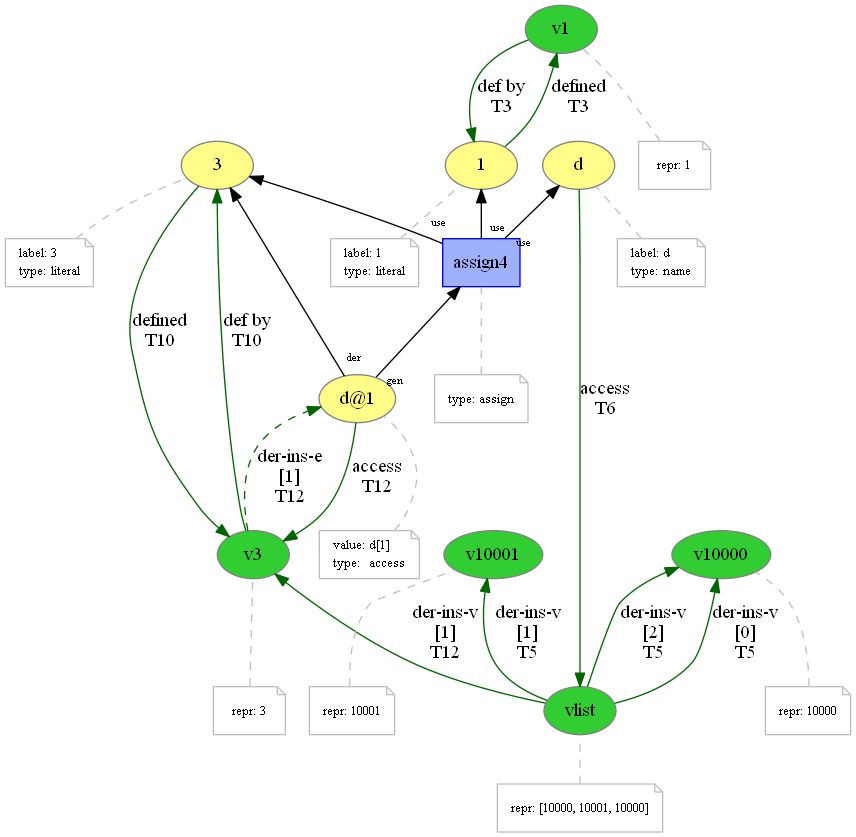

In [10]:
%%provn -o $BASE/part_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// old
value(vlist, [repr="[10000, 10001, 10000]"])
value(v10000, [repr="10000"])
value(v10001, [repr="10001"])
derivedByInsertion(
    -, // list
    vlist,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
entity(d, [label="d", type="script:name"])
accessed(d, vlist, T6)
entity(1, [label="1", type="script:literal"])
value(v1, [repr="1"])
defined(1, v1, T3)
wasDefinedBy(v1, 1, T3)


// new
entity(3, [label="3", type="script:literal"])
value(v3, [repr="3"])
defined(3, v3, T10)
wasDefinedBy(v3, 3, T10)

entity(d@1, [value="d[1]", type="script:access"])
accessed(d@1, v3, T12)
derivedByInsertion(d@1, vlist, {("1", v3)}, T12)

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1, -)
wasDerivedFrom(d@1, 3, assign4, g5, u6)

## Full

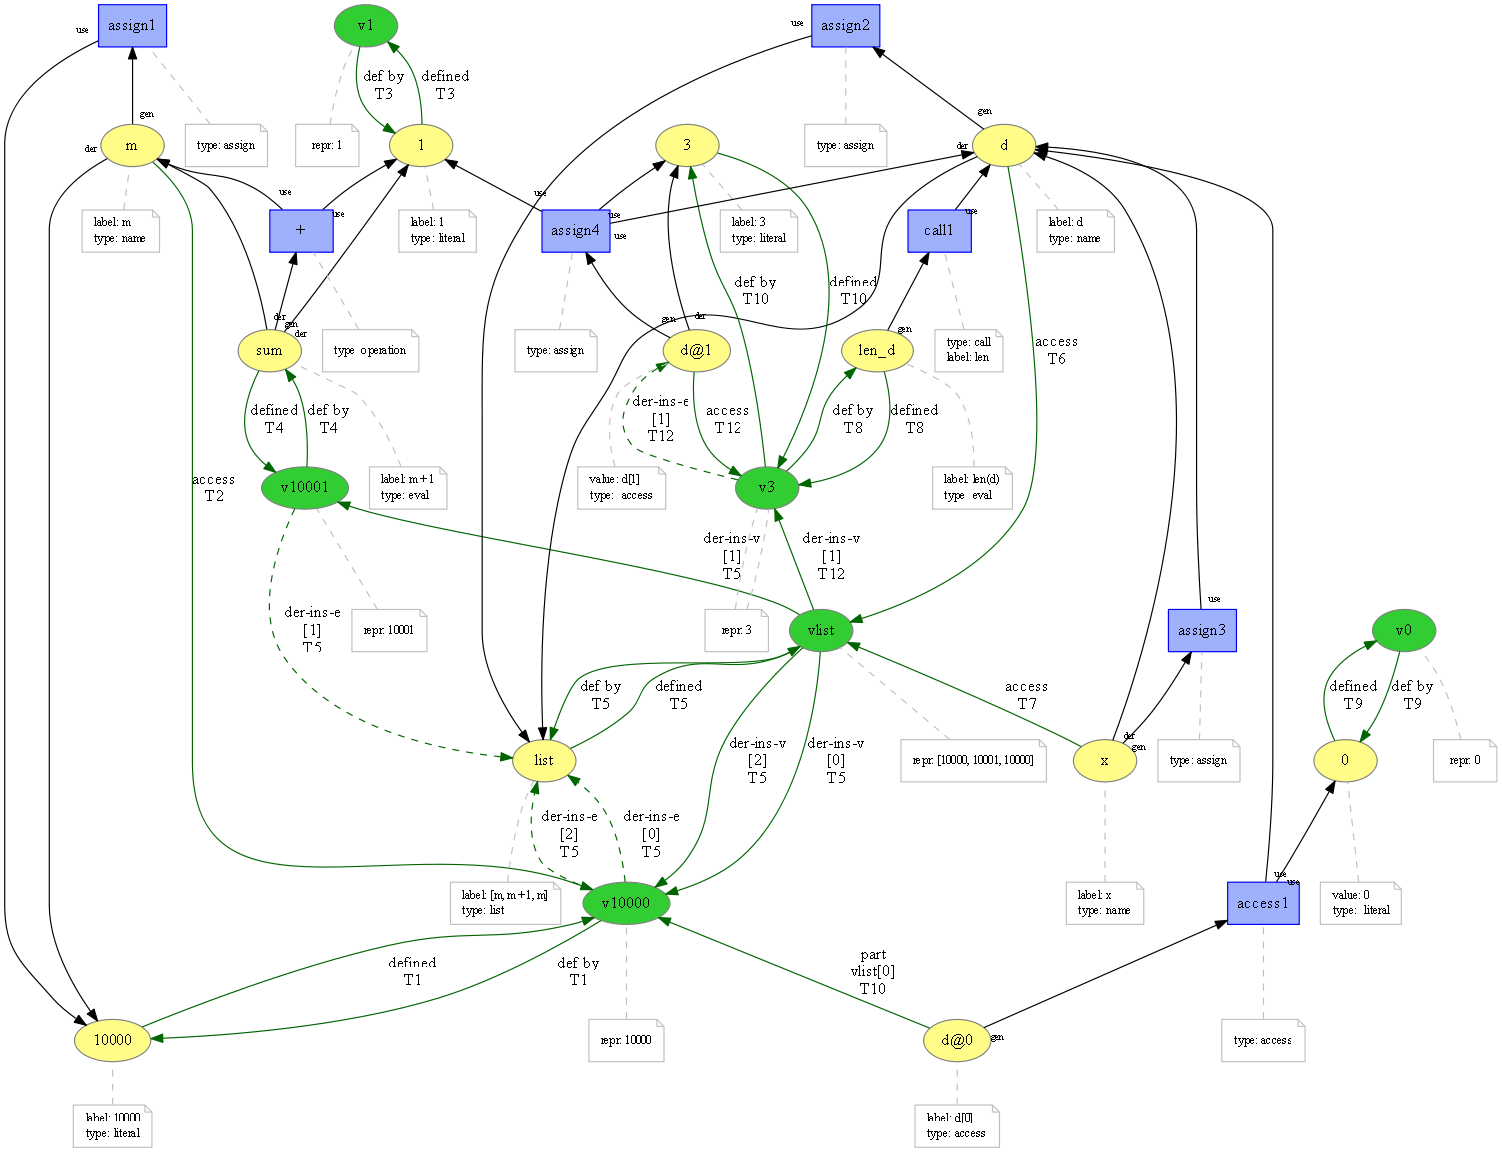

In [11]:
%%provn -o $BASE/full -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>

// assignment
entity(10000, [label="10000", type="script:literal"])
value(v10000, [repr="10000"])
defined(10000, v10000, T1)
wasDefinedBy(v10000, 10000, T1)

entity(m, [label="m", type="script:name"])
accessed(m, v10000, T2)

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1)

// operation
entity(1, [label="1", type="script:literal"])
value(v1, [repr="1"])
defined(1, v1, T3)
wasDefinedBy(v1, 1, T3)

entity(sum, [label="m + 1", type="script:eval"])
value(v10001, [repr="10001"])
defined(sum, v10001, T4)
wasDefinedBy(v10001, sum, T4)

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g2, u3)

// list def
entity(list, [label="[m, m + 1, m]", type="script:list"])
value(vlist, [repr="[10000, 10001, 10000]"])
derivedByInsertion(
    list, vlist,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
defined(list, vlist, T5)
wasDefinedBy(vlist, list, T5)

// list assign
entity(d, [label="d", type="script:name"])
accessed(d, vlist, T6)

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4)

// list assign x
entity(x, [label="x", type="script:name"])
accessed(x, vlist, T7)

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5)

// call
entity(len_d, [label="len(d)", type="script:eval"])
value(v3, [repr="3"])
defined(len_d, v3, T8)
wasDefinedBy(v3, len_d, T8)

activity(call1, [type="script:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

// part access
entity(0, [value="0", type="script:literal"])
value(v0, [repr="0"])
defined(0, v0, T9)
wasDefinedBy(v0, 0, T9)
entity(d@0, [label="d[0]", type="script:access"])
accessedPart(d@0, vlist, "0", v10000, T10)


activity(access1, [type="script:access"])
used(access1, d, -)
used(access1, 0, -)
wasGeneratedBy(g9; d@0, access1, -)

// part assign
entity(3, [label="3", type="script:literal"])
value(v3, [repr="3"])
defined(3, v3, T10)
wasDefinedBy(v3, 3, T10)

entity(d@1, [value="d[1]", type="script:access"])
accessed(d@1, v3, T12)
derivedByInsertion(d@1, vlist, {("1", v3)}, T12)

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1, -)
wasDerivedFrom(d@1, 3, assign4, g5, u6)